# Clasificación de Malware usando el dataset personalizado


Ejercicio practico 2: 
    Integrantes
    Jimmy Rivera
    Grace Proaño
    Danilo Cruz
    Lesly Hidalgo
    Marlon Cumbal

### Visualización

In [1]:
#importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
df= pd.read_csv("C:\\Users\\gadri\\Documents\\TRABAJO 2\\uci_malware_detection.csv")   
dfdataset=pd.DataFrame(df)
dfdataset

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


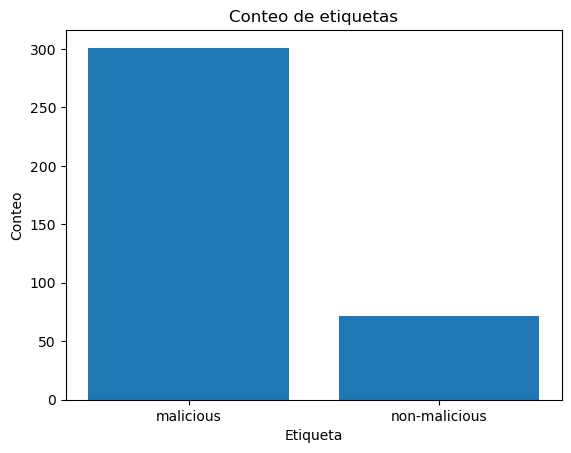

In [3]:
etiquetas = dfdataset['Label'].value_counts()
# Crear una gráfica de barras
plt.bar(etiquetas.index, etiquetas)
plt.xlabel('Etiqueta')
plt.ylabel('Conteo')
plt.title('Conteo de etiquetas')
plt.show()

## Preprocesamiento


In [4]:
#valores nulos o faltantes
nan_por_columna = dfdataset.isna().sum()
print("\nNaN por columna:\n", nan_por_columna) 


NaN por columna:
 Label    0
F_1      0
F_2      0
F_3      0
F_4      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 532, dtype: int64


In [5]:
#tomamos el conjunto de x y encontramos el valor maximo y minimo
df= dfdataset.iloc[:, 1:]
maximo = df.max().max()
minimo = df.min().min()

print("Valor máximo del DataFrame:", maximo)
print("Valor mínimo del DataFrame:", minimo)

Valor máximo del DataFrame: 1
Valor mínimo del DataFrame: 0


Conclusión 1: Se procedió a realizar un análisis de los valores nulos o faltantes, como se pudo observar no existen, razón por la cual no se porcede a realizar una imputación de valores.Por otro lado, dentro del enunciado nos decía que el dataset estaba conformado por 1 y 0, entonces se procedió a ver si existía valores incoherentes. Como se observó, el mínimo y el máximo es 0 y 1 respectivamente, por lo que, no hacemos tratamiento de datos.

### Análisis PCA

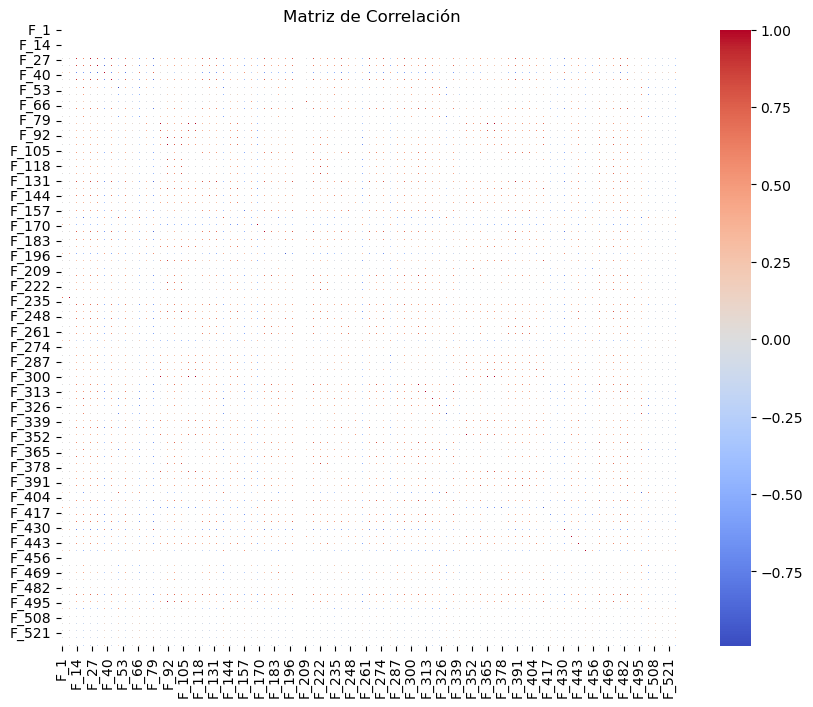

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()
correlation_matrix
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Conclusión 2: El punto de partida para realizar una reducción de dimensionalidad en un conjunto de datos es analizar la correlación entre sus variables. Como se puede observar en la matriz de correlacion visualizada como un mapa de calor , los colores indican el nivel de correlacion entre variables, el color rojo representan una correlacion positiva fuerte, el color azul representan una correlacion negativa fuerte, los colores cerca del blanco representan una correlacion cercana a 0 , en este caso nuestro grafica muestra que no hay muchas correlaciones fuertes entre variables ya que no muestra una desviacion significativa a 0 , lo que implica que son variables independientes  por ende para mi no es necesario aplicar PCA.

### Entrenamiento y validación

In [7]:
#Separación en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(df, dfdataset['Label'], test_size=0.2, random_state=42)
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_val:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_val:", y_test.shape)


Tamaño de X_train: (298, 531)
Tamaño de X_val: (75, 531)
Tamaño de y_train: (298,)
Tamaño de y_val: (75,)


In [8]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = LogisticRegression(random_state=42,dual=False, max_iter=100,verbose=0) #variación de hiperparametros
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo con Regresión Logística: {accuracy * 100:.2f}%')

Precisión del modelo con Regresión Logística: 97.33%


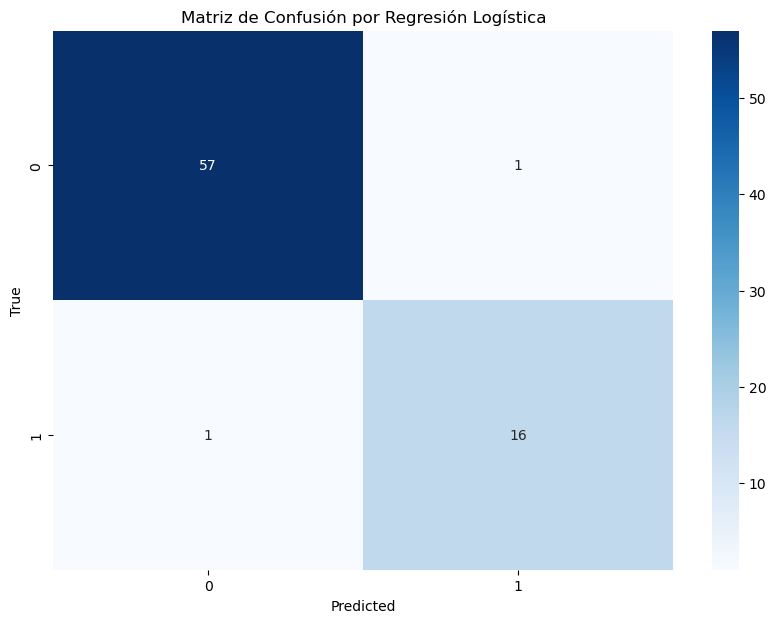

In [9]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión por Regresión Logística')
plt.show()

In [10]:
#vamos a entreanr con un clasificador de arbol
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Árbol de decisión: {accuracy * 100:.2f}%')

Precisión del modelo Árbol de decisión: 94.67%


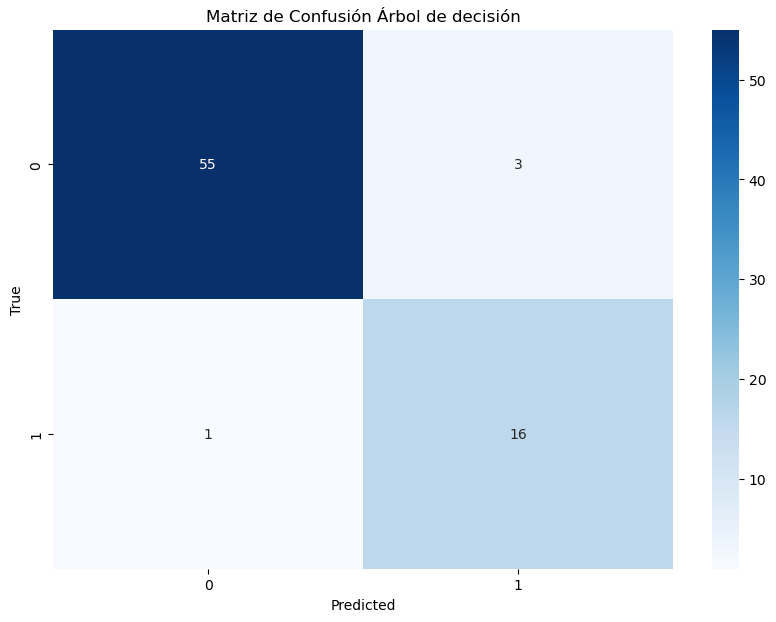

In [11]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión Árbol de decisión')
plt.show()

In [12]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train, y_train)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN: {accuracy * 100:.2f}%')

Precisión del modelo KNN: 97.33%


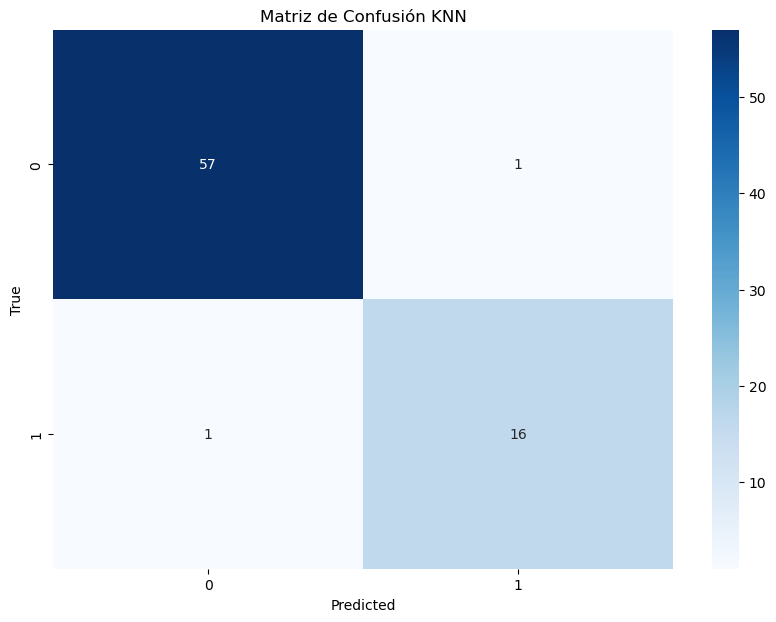

In [13]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión KNN')
plt.show()

Conclusión 3: Se implementaron tres modelos de clasificación y se presentó la matriz de confusión en cada uno. Como se puede apreciar y basado en la métrica accuracy el KNN y regresión logística obtuvieron un mejor rendimiento

### Técnica de balanceo de cargas

In [14]:
#balanceo de cargas 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [21]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = LogisticRegression(random_state=42,dual=False, max_iter=100,verbose=0)
clf.fit(X_train_smote, y_train_smote)
#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo regresión logística balanceado: {accuracy * 100:.2f}%')

Precisión del modelo regresión logística balanceado: 97.33%


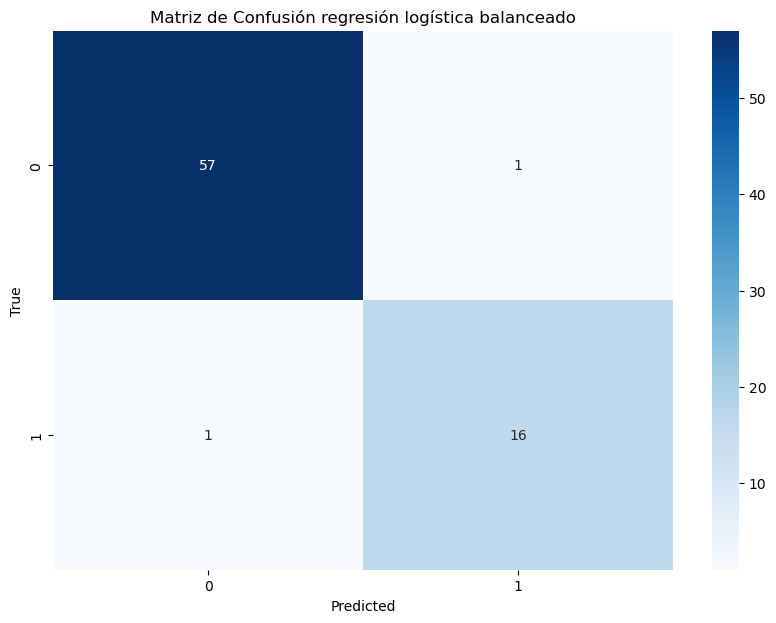

In [16]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión regresión logística balanceado')
plt.show()

In [17]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo arbol de decisión balanceado: {accuracy * 100:.2f}%')

Precisión del modelo arbol de decisión balanceado: 94.67%


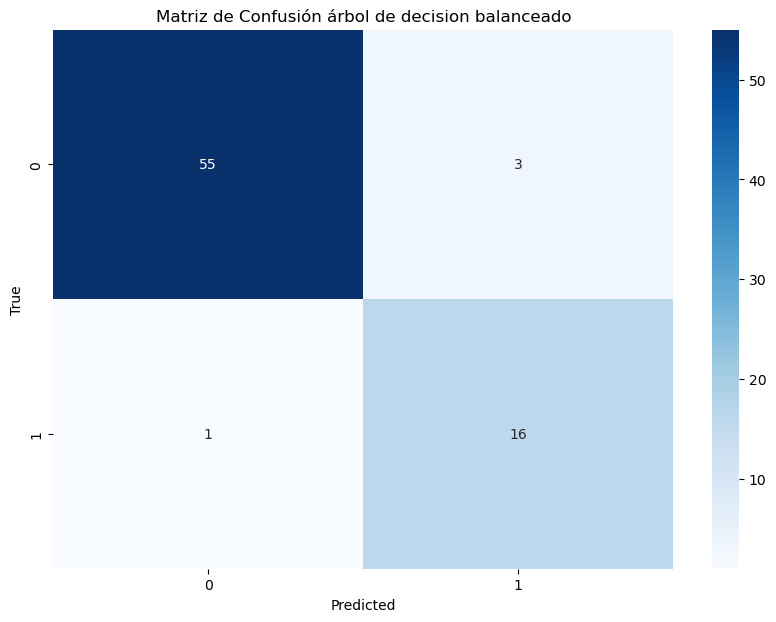

In [18]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión árbol de decision balanceado')
plt.show()

In [19]:
#vamos a entreanr con un clasificador de regresion logisticas
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train_smote, y_train_smote)

#realizamos las predicciones al conjunto de test
y_pred = clf.predict(X_test)
#veriicamos la precision del modelo en base a la métrica de la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo KNN balanceado: {accuracy * 100:.2f}%')

Precisión del modelo KNN balanceado: 97.33%


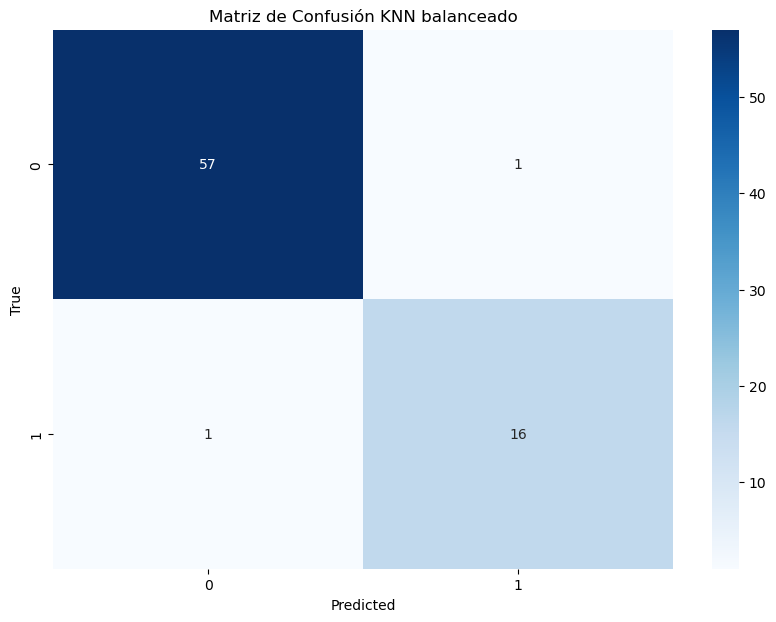

In [20]:
cm = confusion_matrix(y_test, y_pred)
#graficamos la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión KNN balanceado')
plt.show()

Conclusión 4: Como se puede ver en la gráfica existía un mayor catidad de datos maliciosos, lo que provoca un desbalanceo en el conjunto de datos. Para esto aplicamos una técnica denomida smote que básicamente genera nuevas instancias de la clase minoritaria, que en este caso es la de no maliciosa. Los resultados fueron similares a los obtenidos con el conjunto de datos original. Esto nos lleva a que por un lado no es necesario aplicar técnicas para balancear los datos, o a su vez que la técnica elegida no es la correcta.